## Preprocessing: Use wavelet transform as a feature for traning our model

In [1]:
import numpy as np
import cv2
import matplotlib
import pywt
from matplotlib import pyplot as plt
%matplotlib inline


#### Wavelet transform

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [2]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

<Figure size 432x288 with 0 Axes>

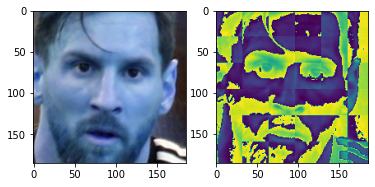

In [3]:
cropped_img = cv2.imread('./dataset/Cropped_lionel messi.png')
im_har = w2d(cropped_img,'db1',5)

plt.figure()
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(cropped_img)
axarr[1].imshow(im_har)

Get the image file paths.

In [4]:
path_to_data = "C:/Users/banda/Documents/Celebrity Face Recognition/dataset/"
path_to_cr_data = "C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/"

import os
cropped_image_dirs = []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        cropped_image_dirs.append(entry.path)
        
cropped_image_dirs

['C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/lionel messi',
 'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sharapova',
 'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/roger federer',
 'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/serena williams',
 'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/virat kohli']

In [5]:
celebrity_file_names_dict = {}

for img_dir in cropped_image_dirs[1:]:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'maria sharapova': ['C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sharapova\\maria sharapova1.png',
  'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sharapova\\maria sharapova10.png',
  'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sharapova\\maria sharapova100.png',
  'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sharapova\\maria sharapova101.png',
  'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sharapova\\maria sharapova102.png',
  'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sharapova\\maria sharapova103.png',
  'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sharapova\\maria sharapova105.png',
  'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sharapova\\maria sharapova106.png',
  'C:/Users/banda/Documents/Celebrity Face Recognition/dataset/cropped/maria sha

In [6]:
total = 0
for key, value in celebrity_file_names_dict.items():
    no_items = len([item for item in value if item])
    print(key, no_items)
    total += no_items
    
print("Total number of cropped images = " + str(total))

maria sharapova 183
roger federer 100
serena williams 172
virat kohli 211
Total number of cropped images = 666


Randomly assign some values for the names which is needed for ML methods.

In [7]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria sharapova': 0,
 'roger federer': 1,
 'serena williams': 2,
 'virat kohli': 3}

In [14]:
# Save class dictionary

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [8]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
        # combine rescaled cropped and wavelet images by virticle stacking
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [9]:
len(X[0])

4096

In [10]:
len(X)

666

Now X is a 'list' type object. So lets reshape this into an array

In [11]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(666, 4096)

In [12]:
np.savez('Model_training_dataset.npz', X_train = X, y_train = y)

In [13]:
X

array([[198., 199., 189., ..., 245.,  34.,   4.],
       [ 15.,  19.,  10., ..., 251.,  64., 111.],
       [240., 219., 192., ..., 173., 233.,   8.],
       ...,
       [ 28.,  25., 225., ..., 127.,   5.,   0.],
       [248., 161.,  68., ...,   0.,   0.,   0.],
       [ 40.,  40.,  40., ..., 223., 224., 226.]])